Owned by Pamela Nguyen

Last Accessed: 11/30/2022

---

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as st
import plotly.express as px

In [3]:
!ls drive/MyDrive/ESC/_million_celegans/rDNA/dataset/wild_isolates

mmp_wild_isolate_data_Mar13.txt


In [4]:
#rDNA copy Number data set
PATH = 'drive/MyDrive/ESC/_million_celegans/rDNA/dataset'
rDNA_CN = pd.read_csv(PATH+'/ChrI_CopyNumber.csv')

# Split and Round the rDNA copy number (rDNA CN)
We first began be rounding the rDNA copy number (rDNA CN), the last column of the ChrI Copynumber dataset, to an integer value for easier comparision later through the analysis. 

In [5]:
rDNA_CN['rDNA_CN'] = np.round(rDNA_CN['rDNA_CN'])

Next, we partitioned the copy number dataset by mutagenized and wild isolates strains. 
The **mutagenized strains** indicies are *0-2006* and the 

**wild isolates** indicies are the rest: *2007-2046*

There were 2007 mutagenized strains and 39 wild isolates strains.

In [6]:
#partition the mutagenized and wild isolate strains
mutCN = rDNA_CN.iloc[0:2007]; #mutCN
wildCN = rDNA_CN.iloc[2007:]; #wildCN

Since the mutagenized and wild-isolates are different dataset entirely, 
their respective copy number strains were separated and will be analysed separately. 

We extracted the outliers from each rDNA copy numbers dataset because this will allow us to observe the rDNA copy number thresholds which are significant. We are interested in the effects a high or low rDNA copy number has on expression and genomic variation. Thus, a box plot was created for both copy number datasets and their extremeties were observed.

From the boxplots we can clearly observe the outliers which occurs at the lower fence ($Q_{3}-1.5*IQR = LF$) and upper fence ($Q_{3}+1.5*IQR = UF$) of the datasets. let $Q_{3}$ represent the third quartile range, $IQR$ represent the interquartile range, $LF$ mean lower fence (of the data) and $UF$ mean upper fence. 

For the mutagenized rDNA CN dataset the lower fence,  $LF_{mut}$, occured $42$, and the upper fence, $UF_{mut}$, occured $149$.

For the wild isolate rDNA CN dataset, there was not a lower fence but the upper fence, $UF_{wild}$, occured at $298$. This tells us that none of the strains in the wild isolate rDNA CN dataset exibited extremely low copy numbers but some strains exhibited high copy numbers. Whereas the mutagenized rDNA CN dataset featured both extremeties. 

In [7]:
def hist_box_plot(df, t):
  fig = px.histogram(df['rDNA_CN'],x='rDNA_CN', marginal='box', title='rDNA CN : '+t, nbins=30)
  fig.show()
hist_box_plot(mutCN, 'mutagenized')
hist_box_plot(wildCN, 'wild isolates')

From here, we extracted only the strains that were present before their respective $LF$ and after $UF$.

In [8]:
LFmutNum, UFmutNum = 42, 149
UFwildNum = 298
LFmut = mutCN[mutCN['rDNA_CN'] < LFmutNum].sort_values(by='rDNA_CN', ascending=False)
UFmut = mutCN[mutCN['rDNA_CN'] > UFmutNum].sort_values(by='rDNA_CN', ascending=False)
UFwild = wildCN[wildCN['rDNA_CN'] > UFwildNum].sort_values(by='rDNA_CN', ascending=False)
UFwild

Strain  Total_Read_Pairs  ChrI_rDNA  rDNA_CN
2043    MY1          15065894     451698    418.0

In [9]:
print(F'There are {len(LFmut)} rows in LFmut')
print(F'There are {len(UFmut)} rows in UFmut')
print(F'There are {len(UFwild)} rows in UFwild')

There are 5 rows in LFmut
There are 69 rows in UFmut
There are 1 rows in UFwild


In [10]:
print(F'There are {len(LFmut)} rows in LFmut')
print(F'There are {len(UFmut)} rows in UFmut')
print(F'There are {len(UFwild)} rows in UFwild')

There are 5 rows in LFmut
There are 69 rows in UFmut
There are 1 rows in UFwild


---

The datasets containing both mutations in the mutagenized strains and mutations in the wild isolates were obtained from:  http://genome.sfu.ca/mmp/

```mutdf``` consist of the entire mutated mutagenized dataset whereas ```wilddf``` consist of the entire mutated wild isolate dataset. 

There are intially **870227** rows in ```mutdf``` and **5039275** rows in ```wilddf```.

In [11]:
#mutagenized dataset read as a dataframe
mutdf = pd.read_csv(PATH+'/mutagenized/mmp_mut_strains_data_Mar14.txt', sep='\t')
#wild-isolate dataset read as a df
wilddf = pd.read_csv(PATH+'/wild_isolates/mmp_wild_isolate_data_Mar13.txt', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [12]:
print(F'There are {len(mutdf)} rows in mutdf')
print(F'There are {len(wilddf)} rows in wilddf')

There are 870227 rows in mutdf
There are 5039275 rows in wilddf


# **Filter** : ```mutdf``` and  ```wilddf```

1. Drop duplicates

2. Extract the rows where ```feature == 'coding_exon'```

3. Extract the rows where ```effect == 'missense' or effect == 'nonsense'```




We began by dropping duplicates and filtering both datasets with our effects of interest. 
We were only interested in the strains featured coding exons and substitution variations. Thus, strains that featured either a missense or nonsense mutation. 

Substitution variants, missense and nonsense variants, occur when a nucleotide, a DNA building block, is replaced with another nucleotide. These substitutions may affect the production of proteins from the altered gene. A missense variant occurs when the altered nucleotide results in the replacement of an amino acid, protein building block, with another protein made from the gene. This may then change the function of the respective protein. A nonsense variant results in a stop signal that prematurely signals the cell to stop building the respective protein. This type of variation shortens the protein which results in it breaking down and or becoming non-functional. 

Ribosomal DNA (rDNA) is a DNA sequence whose prime function is to produce the RNA components of ribosomes. A ribosome is an intracellular structure consisting of both RNA and protein. Given that the ribosome is the site of protein synthesis, we are only interested in the coding exons since this is the region where an RNA transcript is translated into proteins. 

In [13]:
# filters a df
def filter_df(df):
  # We want to drop all duplicates and only keep the first instance
  df = df.drop_duplicates(keep='first')
  effects = np.array(['missense', 'nonsense'])
  # We want the strains that have either a 
  # missense or nonsense mutation
  df = df[df['effect'].isin(effects)]
  # We also only want the strains that occur in the 
  # coding exon
  df = df[df['feature'] == 'coding_exon']
  # sort the strains by their gene for easier analysis later on
  df = df.sort_values(by='gene', ascending=True)
  return df

In [14]:
mutdf = filter_df(mutdf);# mutdf
wilddf = filter_df(wilddf); #wilddf

After the filtering, we are now left with **185521** rows in ```mutdf``` and **387976** rows in ```wilddf```. 

Thus, **684706** rows were removed from ```mutdf``` which results in approximately **0.21** of the dataset remaining. 

Similarly, **4651299** rows were removed from ```wilddf``` which resulted in approximately **0.077** of the wild isolate dataset remaining. 

In [15]:
print('AFTER Filtering:')
print(F'There are {len(mutdf)} rows inx  mutdf')
print(F'There are {len(wilddf)} rows in wilddf')

AFTER Filtering:
There are 185521 rows inx  mutdf
There are 387976 rows in wilddf


# **Boolean df:** ```mt_bool_df``` and ```wild_bool_df```

After filtering both dataframes, we want to create a boolean dataframe with the filtered datasets. Since we are interested in determining the gene expression of these strains, we can create a boolean dataframe which will allows us to determine the genes that are present for each strain. Thus, if there exist at least one instance of said gene in that respective strain, then we will indicate it in the boolean dataframe. 

In [16]:
# create a bool df
def bool_df(df):
  unique_strains = df['strain'].unique()
  unique_genes = df['gene'].unique()
  col_name = np.append(unique_strains, ['row_sum','row_perc'] )
  df_bool = pd.DataFrame(columns = col_name, index=unique_genes)

  # iterate through the unique strains
  for strain in unique_strains:
    # obtain only the current strain of interest from the deleted df
    curr_strain_genes = df[df['strain'] == strain]
    # iterate through the genes
    for gene in curr_strain_genes['gene']:
      # Alter this coord to 1 [true]
      if df_bool.at[gene, strain]:
        df_bool.at[gene, strain] = 1
  
  df_bool = df_bool.fillna(0)
  return df_bool, unique_strains

The following cell took *59 seconds* to execute.

From here, we will take the sum of each gene instance in each strains (row sum) and divide each row sum by the total number of strains that were filtered to obtain the row percentages. The row percentages will allow us to determine the gene frequency for the population. This allows us to determine which percentage of the population carries a particular gene variant.

In [17]:
# create the boolean dataframes
mt_bool, mt_unique_strains = bool_df(mutdf)
wild_bool, wild_unique_strains = bool_df(wilddf)

In [18]:
# get the row sums and row percentages
def row_sum_and_perc(df_bool, unique_strains):
  num_strains = len(unique_strains)

  for gene in (list(df_bool.index)):
    df_bool.at[gene, 'row_sum'] = sum(df_bool.loc[gene][:-2])
    df_bool.loc[gene, 'row_perc'] = df_bool.at[gene, 'row_sum']/num_strains

The following cell took *46 seconds* to execute.

In [19]:
#get the row sums and percentages
row_sum_and_perc(mt_bool, mt_unique_strains)
row_sum_and_perc(wild_bool, wild_unique_strains)

There are **19603** unique genes present in ```mt_bool``` and **14039** unique genes present in ```wild_bool```



# **Outlier Strains:**``` LFmutOutliers```, ```UFmutOutliers```, and ```UFwildOutliers```.

From the outlier strains previously determined: 5 rows in LFmut, 69 rows in UFmut, and 1 rows in UFwild, we will extract these strains from their respective dataframes and extract their genes. This will allow us to target only the genes that correlate to a high or low rDNA copy number from the outlier strains. 

In [20]:
# Return the mutant strain rows
def get_mutant_strain_rows(outlier_strains, wild_df):
  df = pd.DataFrame()
  for strain in outlier_strains['Strain']:
    df = pd.concat([df, wild_df.loc[wild_df['strain'] == strain]])
  return df

In [21]:
LFmutOutliers = get_mutant_strain_rows(LFmut, mutdf)
UFmutOutliers = get_mutant_strain_rows(UFmut, mutdf)
UFwildOutliers = get_mutant_strain_rows(UFwild, wilddf)

In [22]:
print(F'There are {len(LFmutOutliers)} rows in LFmut with {LFmutOutliers["gene"].nunique()} unique genes given {LFmutOutliers["strain"].nunique()} unique outlier(s)')
print(F'There are {len(UFmutOutliers)} rows in UFmut given {UFmutOutliers["gene"].nunique()} unique genes {UFmutOutliers["strain"].nunique()} unique outlier(s)')
print(F'There are {len(UFwildOutliers)} rows in UFwild given {UFwildOutliers["gene"].nunique()} unique genes {UFwildOutliers["strain"].nunique()} unique outlier(s)')

There are 514 rows in LFmut with 495 unique genes given 5 unique outlier(s)
There are 6103 rows in UFmut given 4735 unique genes 69 unique outlier(s)
There are 9679 rows in UFwild given 3715 unique genes 1 unique outlier(s)


Next, we will create a similar boolean dataframe, to that which was previously done, with their respective row sum and row percentages for each set of outliers: ``` LFmutOutliers```, ```UFmutOutliers```, and ```UFwildOutliers```. Additionally, we will partition each set of outliers further by their respective **nonsense** and **missense** mutation. This will allow us to further see what type of substitution is occuring which each gene variant. 

In [23]:
# partitions the dataframes by missense and nonsense 
def miss_or_nonsense(df):
  return df[df['effect'] == 'missense'], df[df['effect'] == 'nonsense']

In [24]:
# The 0th index represent the missense variants 
# The 1st index represent the nonsense variants
LFmutOutliers = miss_or_nonsense(LFmutOutliers)
UFmutOutliers = miss_or_nonsense(UFmutOutliers)
UFwildOutliers = miss_or_nonsense(UFwildOutliers)

In [25]:
print(F'From the {len(LFmutOutliers[0]) + len(LFmutOutliers[1])} rows in LFmut,  {len(LFmutOutliers[0])} are missense and {len(LFmutOutliers[1])} are nonsense')
print(F'From the {len(UFmutOutliers[0]) + len(UFmutOutliers[1])} rows in UFmut,  {len(UFmutOutliers[0])} are missense and {len(UFmutOutliers[1])} are nonsense')
print(F'From the {len(UFwildOutliers[0]) + len(UFmutOutliers[1])} rows in UFwild,  {len(UFwildOutliers[0])} are missense and {len(UFwildOutliers[1])} are nonsense')

From the 514 rows in LFmut,  488 are missense and 26 are nonsense
From the 6103 rows in UFmut,  5804 are missense and 299 are nonsense
From the 9886 rows in UFwild,  9587 are missense and 92 are nonsense


In [26]:
# Get the bool df and unique strains
LFmutBool_mis, LFmutUniqueStrain_mis = bool_df(LFmutOutliers[0])
LFmutBool_non, LFmutUniqueStrain_non = bool_df(LFmutOutliers[1])
UFmutBool_mis, UFmutUniqueStrain_mis = bool_df(UFmutOutliers[0])
UFmutBool_non, UFmutUniqueStrain_non = bool_df(UFmutOutliers[1])
UFwildBool_mis, UFwildUniqueStrain_mis = bool_df(UFwildOutliers[0])
UFwildBool_non, UFwildUniqueStrain_non = bool_df(UFwildOutliers[1])
Outliers = np.array([LFmutBool_mis, LFmutUniqueStrain_mis, \
                     LFmutBool_non, LFmutUniqueStrain_non, \
                     UFmutBool_mis, UFmutUniqueStrain_mis, \
                     UFmutBool_non, UFmutUniqueStrain_non, \
                     UFwildBool_mis, UFwildUniqueStrain_mis, \
                     UFwildBool_non, UFwildUniqueStrain_non])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [27]:
# Get the row sums and row percentages in bulk
for i in range(0, len(Outliers), 2):
  row_sum_and_perc(Outliers[i], Outliers[i+1])

Next, we will get the genes that were present in more than a given threshold. We first set the threshold at one and gradually increased it in order to reduce the number of rows present.

In [28]:
# obtain the rows whose row_perc > num_strains/unique_strains to obtain
# the given threshold
num_strains = 1;
def greater_than(df_bool, unique_strains, num_strains):
  THRESHOLD = num_strains/len(unique_strains) #more than 1 strain, Threshold for row perc
  return df_bool[df_bool['row_perc'] > THRESHOLD].sort_values('row_perc', ascending = False)

In [29]:
# Obtain the partition for the outliers strains greater
# than a threshold in nulk
LFmutBool_mis = greater_than(Outliers[0], Outliers[1], num_strains)
LFmutBool_non = greater_than(Outliers[2], Outliers[3], num_strains)
UFmutBool_mis = greater_than(Outliers[4], Outliers[5], num_strains)
UFmutBool_non = greater_than(Outliers[6], Outliers[7], num_strains)
UFwildBool_mis = greater_than(Outliers[8], Outliers[9], num_strains)
UFwildBool_non = greater_than(Outliers[10], Outliers[11], num_strains)

GreaterThan = np.array([LFmutBool_mis, LFmutBool_non, UFmutBool_mis, UFmutBool_non, UFwildBool_mis, UFwildBool_non])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



**Key:**

[0] = ```LFmutBool_mis```

[2] = ```LFmutBool_non```

[4] = ```UFmutBool_mis```

[6] = ```UFmutBool_non```

[8] = ```UFwildBool_mis```

[10] = ```UFwildBool_non```

In [30]:
for i in range (0, len(GreaterThan), 1):
  print(F'[{i*2}] There are originally {len(Outliers[i*2])} rows but {len(GreaterThan[i])} were greater than the threshold')

[0] There are originally 469 rows but 9 were greater than the threshold
[2] There are originally 26 rows but 0 were greater than the threshold
[4] There are originally 4540 rows but 864 were greater than the threshold
[6] There are originally 295 rows but 4 were greater than the threshold
[8] There are originally 3697 rows but 0 were greater than the threshold
[10] There are originally 83 rows but 0 were greater than the threshold


# **Common Rows:**
Now that we have determined the genes that are present in the strains greater than the given threshold, we can obtain those genes from the original dataset. Now, we know that these genes are present in strains that have exhibited an abnormal rDNA copy number while being present in more than one strain. From our outliers, only ```LFmut_mis```, ```UFmut_mis``` and ```UFmut_non``` exhibit genes present in more than one gene. Thus, it would be sufficient to only iterate through these three outlier sets to obtain the common genes

In [31]:
def get_common_genes(outlier_gt, df):
  '''
  @return df - a DataFrame of the common genes rows between the 
                outlier_gt and wild_df 
  '''
  new_df = pd.DataFrame()
  for gene in list(outlier_gt.index):
    new_df = pd.concat([new_df, df.loc[df['gene'] == gene]])
  return new_df

In [32]:
# Get the common rows for the outlier gene
LFmutCommon_mis = get_common_genes(GreaterThan[0], mutdf)
UFmutCommon_mis = get_common_genes(GreaterThan[2], mutdf)
UFmutCommon_non = get_common_genes(GreaterThan[3], mutdf)
CommonRows = np.array([LFmutCommon_mis, UFmutCommon_mis, UFmutCommon_non])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [33]:
print(F'There are {len(CommonRows[0])} common gene rows from the {CommonRows[0]["gene"].nunique()} unique genes')
print(F'There are {len(CommonRows[1])} common gene rows from the {CommonRows[1]["gene"].nunique()} unique genes')
print(F'There are {len(CommonRows[2])} common gene rows from the {CommonRows[2]["gene"].nunique()} unique genes')

There are 677 common gene rows from the 9 unique genes
There are 22568 common gene rows from the 864 unique genes
There are 78 common gene rows from the 4 unique genes


# Wash, Rinse, Repeat
From these common rows, we want to perform the same procedure previously executed.
1. Get the boolean DataFrame for each set of common genes

2. Get the row sums and row percentages

In [34]:
LFmutCommonBool_mis, LFmutCommonUniqueStrains_mis = bool_df(CommonRows[0])
UFmutCommonBool_mis, UFmutCommonUniqueStrains_mis = bool_df(CommonRows[1])
UFmutCommonBool_non, UFmutCommonUniqueStrains_non = bool_df(CommonRows[2])
CommonBool = np.array([LFmutCommonBool_mis, LFmutCommonUniqueStrains_mis, \
                       UFmutCommonBool_mis, UFmutCommonUniqueStrains_mis, \
                       UFmutCommonBool_non, UFmutCommonUniqueStrains_non])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [35]:
for i in range(0, len(CommonBool), 2):
  row_sum_and_perc(CommonBool[i], CommonBool[i+1])

# Gene Frequency

Finally, we want to get the gene frequencies of each gene from the outlier datasets with respect to the common genes between each resective outlier dataset and the entire dataset. 

The gene frequency was calculated as follows:

$$\mbox{Gene Frequency} = \frac{\mbox{GreaterThan Row Percentage}}{\mbox{Common Row Percentage}}$$

Obtaining the gene frequency in this fashion allows us to compare the presence of the number of outliers with respect to their respective background. 

In [36]:
# Get a gene freq dict
def get_gene_dict(gt_df, common_df):
  gene_freq_dict = {}
  genes = list(gt_df.index)
  for gene in genes:
    gene_freq_dict[gene] = float(gt_df.loc[gene]['row_perc']/common_df.loc[gene]['row_perc'])
  return gene_freq_dict

In [37]:
GreaterThan[2]

VC20198  VC20200  VC40204  VC20009  VC40002  VC20201  VC20206  \
W06H8.8          0        0        0        0        0        0        0   
ZK617.1          0        0        0        0        0        0        0   
F47A4.2          0        0        1        0        0        0        0   
F20G4.3          0        0        0        0        0        0        0   
B0350.2          0        0        0        0        0        0        0   
...            ...      ...      ...      ...      ...      ...      ...   
Y110A7A.1        0        0        0        0        0        0        0   
Y39B6A.19        0        0        0        0        0        0        0   
Y57G11A.1        0        0        0        0        0        0        0   
ZC334.7          0        0        0        0        0        0        0   
Y113G7A.4        0        0        0        0        0        0        0   

           VC20073  VC20197  VC20188  ...  VC40516  VC20401  VC40589  VC40198  \
W06H8.8          0        0        0  ...        1        0        0        0   
ZK617.1          0        0        0  ...        0        0        0        1   
F47A4.2          0        1        0  ...        0        0        0        0   
F20G4.3          0        0        0  ...        0        0        0        0   
B0350.2          0        0        0  ...        0        0        0        0   
...            ...      ...      ...  ...      ...      ...      ...      ...   
Y110A7A.1        0        0        0  ...        0        0        0        0   
Y39B6A.19        0        0        0  ...        0        0        0        0   
Y57G11A.1        0        0        0  ...        1        0        0        0   
ZC334.7          0        0        0  ...        0        0        0        0   
Y113G7A.4        0        0        0  ...        0        0        0        0   

           VC40871  VC20189  VC30024  VC10116  row_sum  row_perc  
W06H8.8          0        0        0        0        8  0.115942  
ZK617.1          0        0        0        0        7  0.101449  
F47A4.2          0        0        0        0        7  0.101449  
F20G4.3          0        1        0        0        7  0.101449  
B0350.2          0        0        0        0        6  0.086957  
...            ...      ...      ...      ...      ...       ...  
Y110A7A.1        0        0        0        0        2  0.028986  
Y39B6A.19        0        0        0        0        2  0.028986  
Y57G11A.1        0        0        0        0        2  0.028986  
ZC334.7          0        0        0        0        2  0.028986  
Y113G7A.4        0        1        1        0        2  0.028986  

[864 rows x 71 columns]

In [38]:
# Get the gene frequency dict for each outlier set
LFmutGeneFreqDict_mis = get_gene_dict(GreaterThan[0], CommonBool[0])
UFmutGeneFreqDict_mis = get_gene_dict(GreaterThan[2], CommonBool[2])
UFmutGeneFreqDict_non = get_gene_dict(GreaterThan[3], CommonBool[4])
GeneFreqDict = np.array([LFmutGeneFreqDict_mis, UFmutGeneFreqDict_mis, UFmutGeneFreqDict_non])

In [39]:
# Graph a histogram of each gene frequency dict
# in descending order
def hist_dict(d, t, size, font, y):
  df = pd.DataFrame({'gene':d.keys(), 'freq':d.values()}).sort_values(by='freq', ascending=False)
  figure(num=None, figsize=size, dpi=256, facecolor='w', edgecolor='r')
  sns.barplot(x=df['freq'], y=df['gene'] )
  if y: 
    plt.xticks(np.arange(0,np.ceil(max(df['freq']) + 1), 2))
  plt.xlabel('Row Percentage Frequency', fontsize=font)
  plt.ylabel('Gene')
  plt.title('Gene Frequency: ' + t)
  plt.grid(alpha=0.4)

In [40]:
mutdf[mutdf['gene'] == 'D1081.8']

no    allele   strain chr      pos wt_dna mut_dna      feature  \
290403  290404  gk415263  VC30109   I  8491563      A       C  coding_exon   
34514    34515  gk116993  VC20170   I  8491755      C       T  coding_exon   
582019  582020  gk673760  VC40515   I  8493177      C       T  coding_exon   
515674  515675  gk608362  VC40381   I  8492426      C       T  coding_exon   
407165  407166  gk501932  VC40183   I  8495028      T       A  coding_exon   
589139  589140  gk680782  VC40531   I  8492252      G       A  coding_exon   
678167  678168  gk767921  VC40699   I  8492657      G       A  coding_exon   
377639  377640  gk473444  VC40124   I  8495608      C       T  coding_exon   
121246  121247  gk116994  VC20418   I  8492319      G       A  coding_exon   
692066  692067  gk781603  VC40729   I  8492921      C       T  coding_exon   
62830    62831  gk116995  VC20254   I  8492687      A       T  coding_exon   
758974  758975  gk848210  VC40853   I  8492636      C       T  coding_exon   

           gene      CGC    effect wt_prot mut_prot  Grantham  GERP  phyloP  \
290403  D1081.8  D1081.8  missense       D        A     126.0  3.81   1.633   
34514   D1081.8  D1081.8  missense       T        I      89.0  3.81   2.360   
582019  D1081.8  D1081.8  missense       A        V      64.0  3.81   2.360   
515674  D1081.8  D1081.8  missense       H        Y      83.0  3.81   2.360   
407165  D1081.8  D1081.8  missense       H        Q      24.0  3.81   1.836   
589139  D1081.8  D1081.8  missense       G        S      56.0  3.81   2.420   
678167  D1081.8  D1081.8  missense       G        S      56.0  3.81   2.420   
377639  D1081.8  D1081.8  missense       A        V      64.0  3.81   2.360   
121246  D1081.8  D1081.8  missense       G        E      98.0  3.81   2.420   
692066  D1081.8  D1081.8  missense       P        S      74.0  3.81   2.360   
62830   D1081.8  D1081.8  missense       T        S      58.0  3.81   1.633   
758974  D1081.8  D1081.8  missense       H        Y      83.0  3.81   2.360   

        phastCons      cds  aa_pos domain_affected  
290403      0.998  D1081.8    55.0      SANT,SMART  
34514       0.992  D1081.8   119.0             NaN  
582019      1.000  D1081.8   560.0    DUF3351,PFAM  
515674      0.997  D1081.8   310.0             NaN  
407165      0.999  D1081.8   667.0             NaN  
589139      0.997  D1081.8   252.0             NaN  
678167      1.000  D1081.8   387.0    DUF3351,PFAM  
377639      1.000  D1081.8   751.0             NaN  
121246      0.996  D1081.8   274.0             NaN  
692066      1.000  D1081.8   475.0    DUF3351,PFAM  
62830       0.979  D1081.8   397.0    DUF3351,PFAM  
758974      0.996  D1081.8   380.0    DUF3351,PFAM

Now that we've obtained the a histogram for each remaining gene frequency outlier dataset, we can not determine which genes are overally expressed depending on each dataset. :)

From here, we can input each gene into wormbase to determine their function and find a correlation in function for each gene.

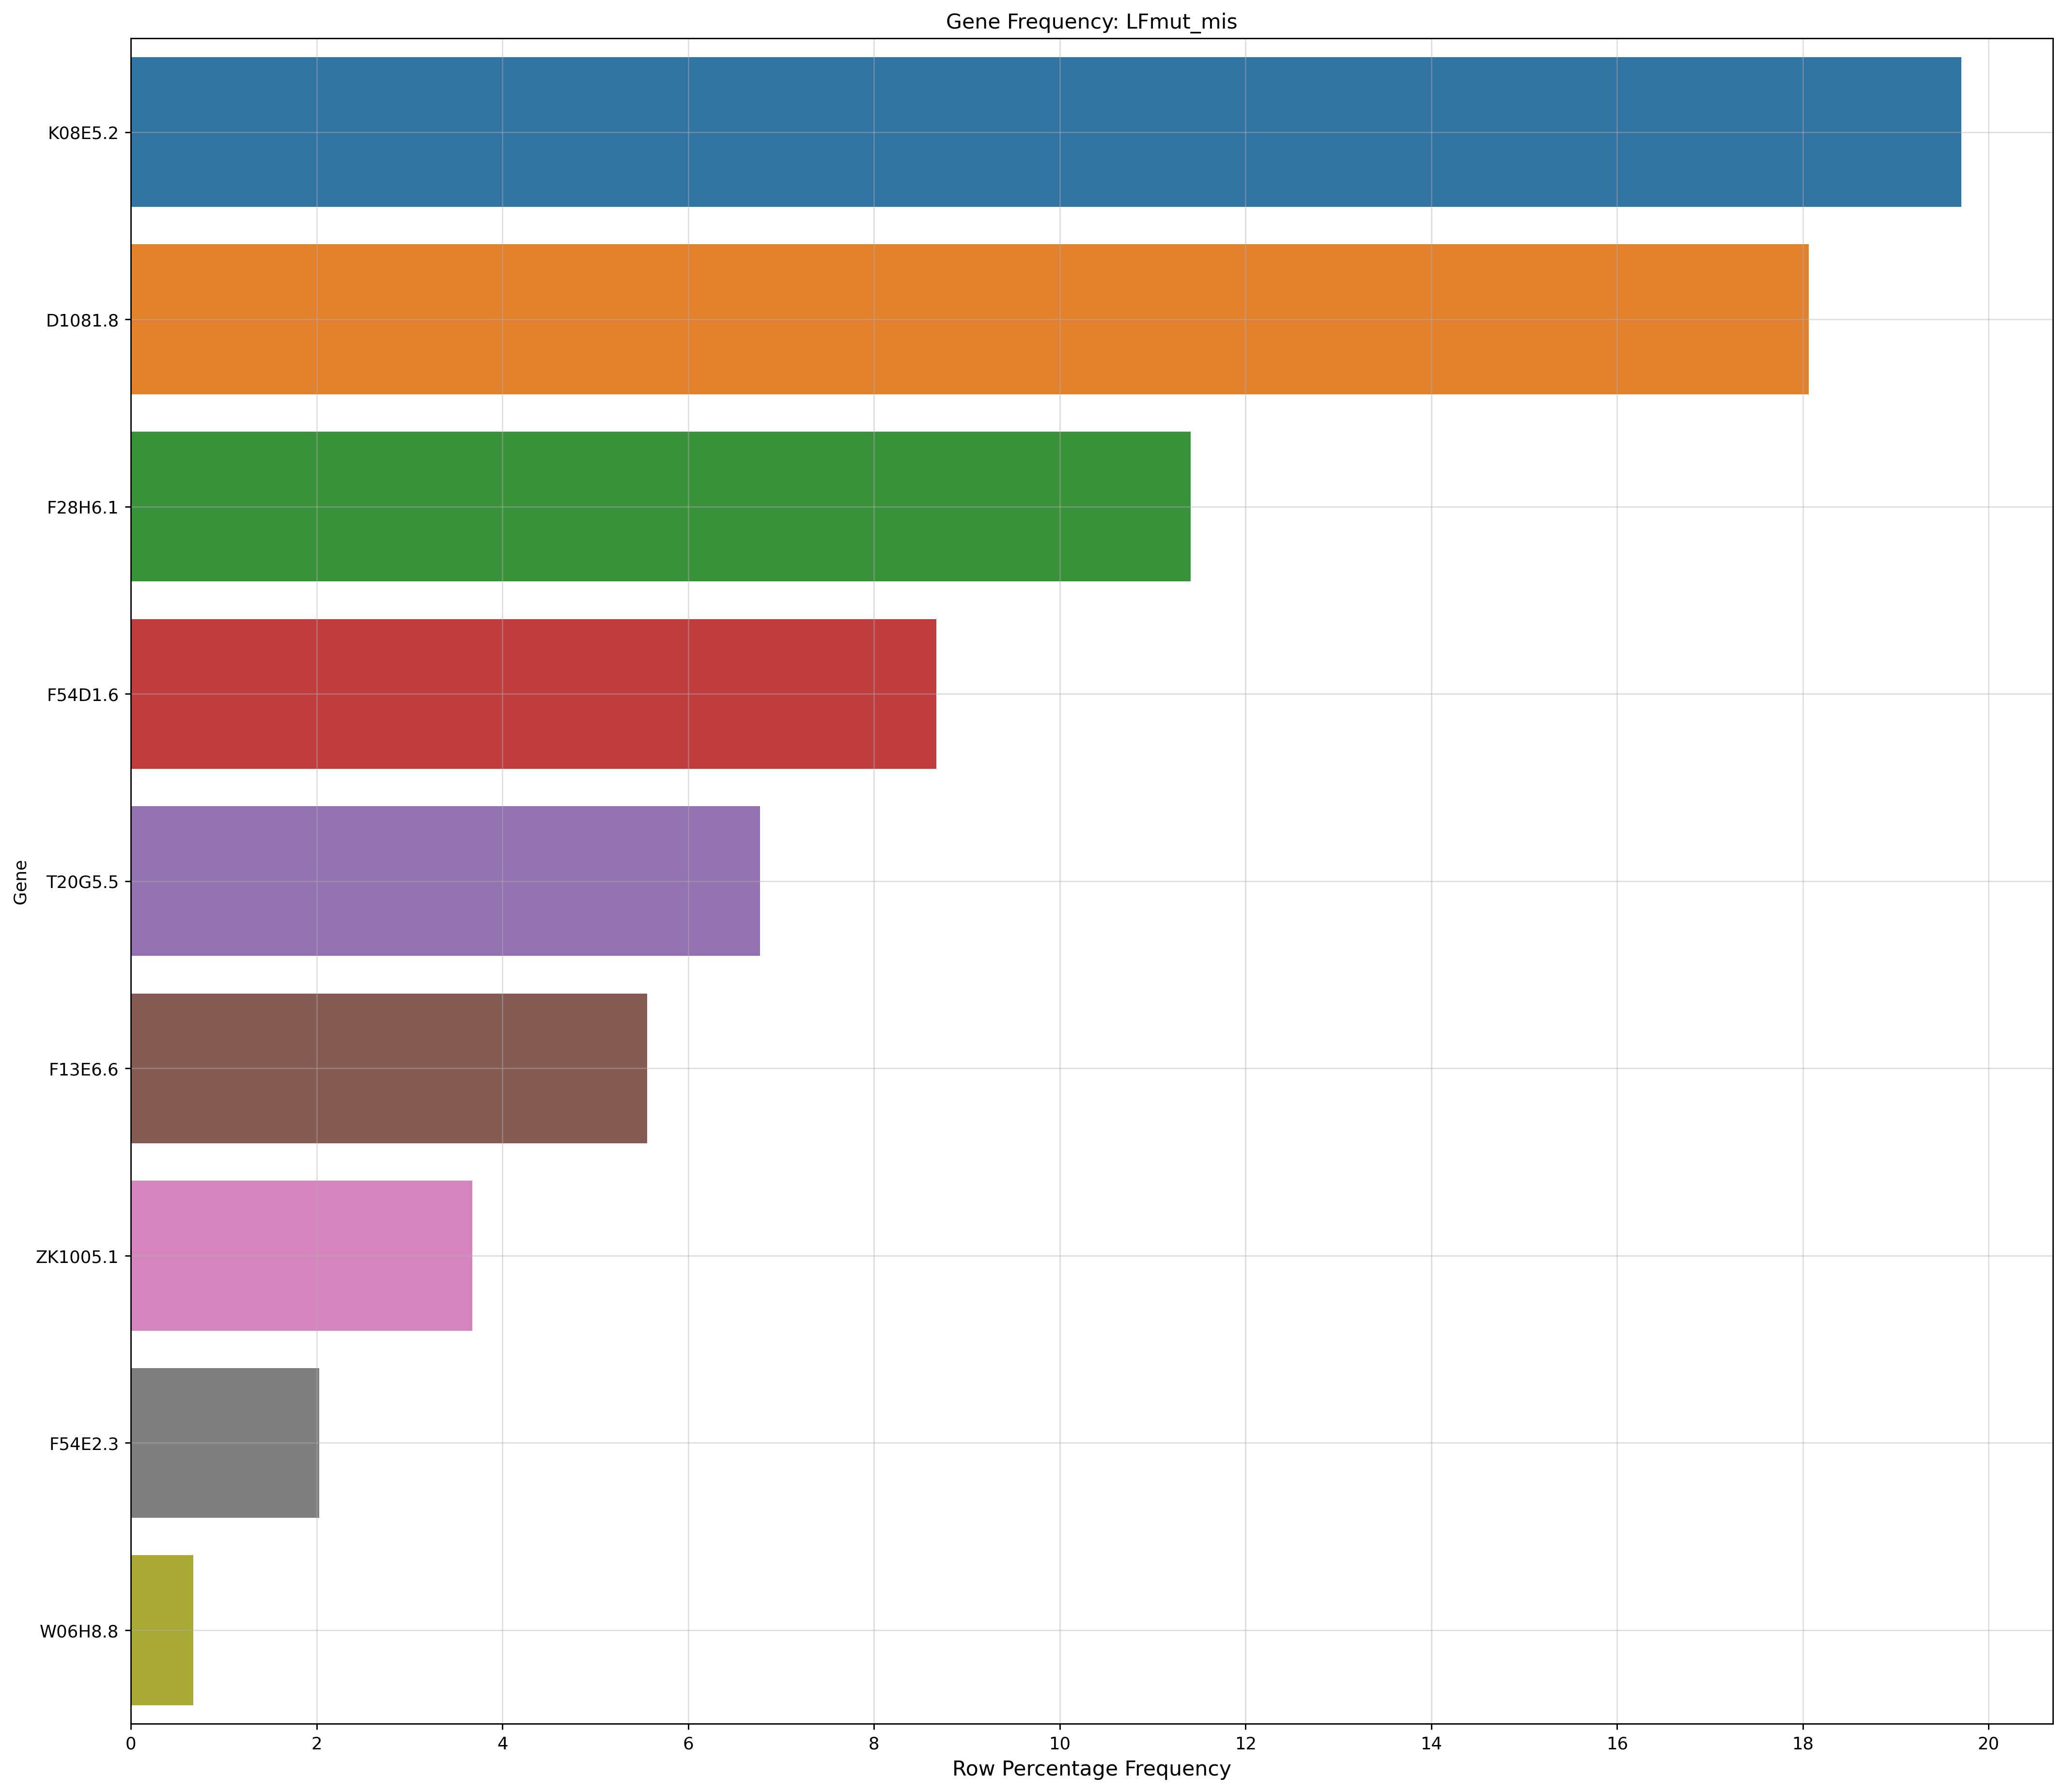

In [41]:
titles = ['LFmut_mis', 'UFmut_mis', 'UFmut_non']
size = (20, 18)
font = 12
hist_dict(GeneFreqDict[0], titles[0], size, font, 'False')

In [42]:
size = (20, 130)
font = 7
hist_dict(GeneFreqDict[1], titles[1], size, font, True)

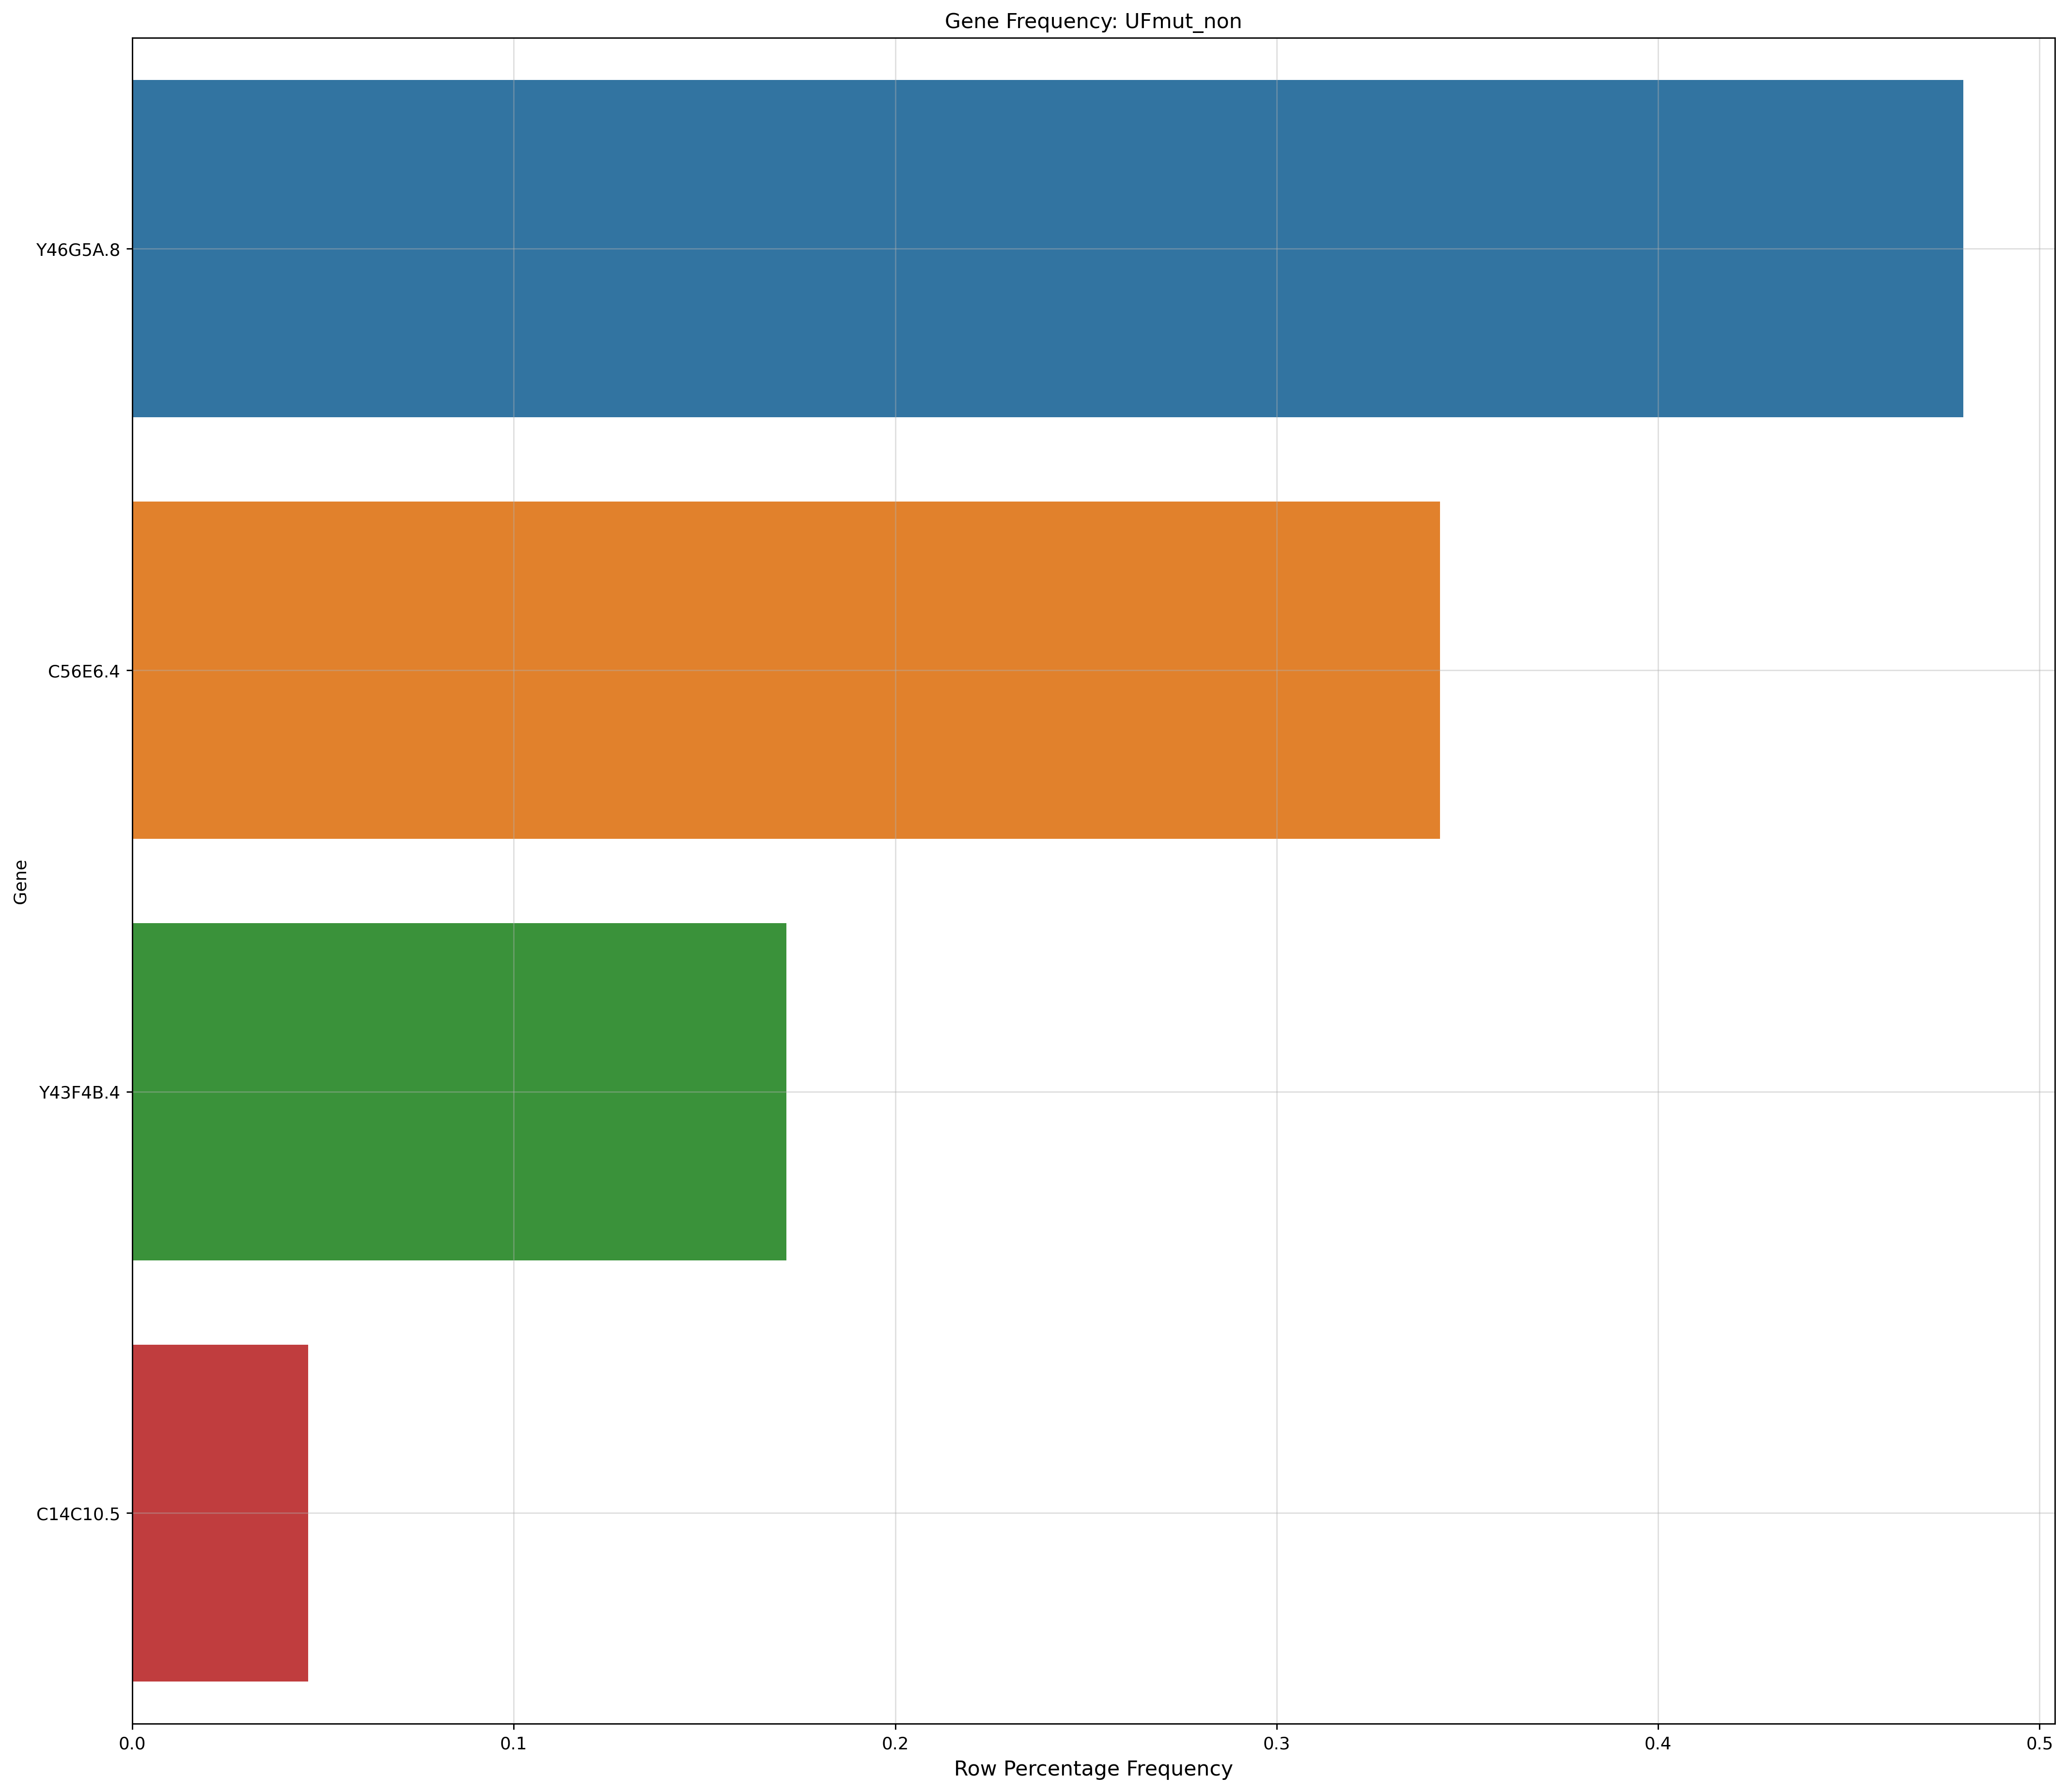

In [43]:
size = (20, 18)
font = 12
hist_dict(GeneFreqDict[2], titles[2], size, font, False)

In [47]:
for i in range(3):
  print(F'There are {len(GeneFreqDict[i])} genes in {titles[i]}')

There are 9 genes in LFmut_mis
There are 864 genes in UFmut_mis
There are 4 genes in UFmut_non
